In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
data = pd.read_csv("C:/Users/zhuyu/OneDrive/桌面/MScGIS/0004 Machine Learning/bank-additional/bank-additional/bank-additional-full.csv")

In [2]:
cat_to_code = data.select_dtypes(['object']).astype('category').apply(lambda x: x.cat.codes)
data[list(cat_to_code)] = cat_to_code
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [10]:
data = data.sample(frac=1)
data.head()

import numpy as np

# this sets the numpy to print numbers with float precision (this setting affects only the prints not the actual values)
np.set_printoptions(suppress=True)

xs, ys = np.split(data.values, [20], axis=1)

n_train = len(xs) * 80 // 100
xs_train, xs_test = np.split(xs, [n_train], axis=0)
ys_train, ys_test = np.split(ys, [n_train], axis=0)

print('training set shape:\t', xs_train.shape)
print('test set shape:\t\t', xs_test.shape)
print('training set Y shape:\t', ys_train.shape)
print('test set Y shape:\t', ys_test.shape)

training set shape:	 (32950, 20)
test set shape:		 (8238, 20)
training set Y shape:	 (32950, 1)
test set Y shape:	 (8238, 1)


In [24]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 10)
tree_clf.fit(xs_train, ys_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

[Text(134.70872395833334, 207.55636363636364, 'X[19] <= 5087.65\nentropy = 0.509\nsamples = 32950\nvalue = [29228, 3722]'),
 Text(50.63736979166667, 187.7890909090909, 'X[10] <= 159.5\nentropy = 0.99\nsamples = 3977\nvalue = [2225, 1752]'),
 Text(11.366666666666667, 168.0218181818182, 'X[10] <= 80.5\nentropy = 0.608\nsamples = 1374\nvalue = [1169, 205]'),
 Text(3.1000000000000005, 148.25454545454545, 'X[10] <= 62.5\nentropy = 0.137\nsamples = 366\nvalue = [359, 7]'),
 Text(2.5833333333333335, 128.48727272727274, 'entropy = 0.0\nsamples = 202\nvalue = [202, 0]'),
 Text(3.616666666666667, 128.48727272727274, 'X[0] <= 39.5\nentropy = 0.254\nsamples = 164\nvalue = [157, 7]'),
 Text(3.1000000000000005, 108.72, 'X[14] <= 1.5\nentropy = 0.397\nsamples = 89\nvalue = [82, 7]'),
 Text(2.066666666666667, 88.95272727272729, 'X[0] <= 38.5\nentropy = 0.279\nsamples = 83\nvalue = [79, 4]'),
 Text(1.5500000000000003, 69.18545454545455, 'X[9] <= 2.5\nentropy = 0.226\nsamples = 82\nvalue = [79, 3]'),
 T

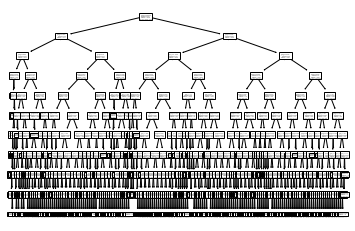

In [25]:
from sklearn.tree import plot_tree
plot_tree(tree_clf)

In [26]:
from sklearn.metrics import accuracy_score
ys_train_pred = tree_clf.predict(xs_train)

print("The train accuracy is " , accuracy_score(ys_train, ys_train_pred))

ys_test_pred = tree_clf.predict(xs_test)

print("The test accuracy is " , accuracy_score(ys_test, ys_test_pred))

The train accuracy is  0.9358118361153263
The test accuracy is  0.9079873755765963
